In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
#=== model_1,==== natural exponential growth

In [4]:
def f1(t,x):
    return k*x

In [5]:
k=0.2
x0=np.array([30])

In [6]:
ans1=sp.integrate.solve_ivp(
    f1,[0,10],x0,dense_output=True)

In [7]:
t=np.linspace(0,5,20)
t2=np.linspace(0,5,5000)

In [8]:
X=ans1.sol(t).T

In [9]:
X.shape

(20, 1)

In [10]:
Xm=X.reshape(-1,1,1).copy()
Xm.shape

(20, 1, 1)

In [11]:
t.shape

(20,)

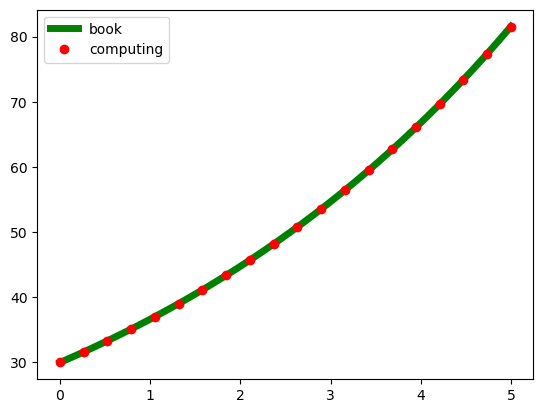

In [12]:
plt.plot(t2,x0*np.exp(k*t2),'g-',lw=5,label='book')
plt.plot(t,Xm[:,0,0],'ro',label='computing')
plt.legend()

In [13]:
#=== model_2, natural growth with a maximum capacity===
#=====================logistic groth===============

In [14]:
def f2(t,x):
    return np.array(k*x*(1-x/M))

In [15]:
M=1e6

In [16]:
ans2=sp.integrate.solve_ivp(f2,[0,1000],x0,dense_output=True)

In [17]:
logistic=lambda t: M/(1+(M-30)/30*np.exp(-k*t))

In [18]:
t3=np.linspace(0,100,5000)
t4=np.linspace(0,100,30)
X2=ans2.sol(t4).T

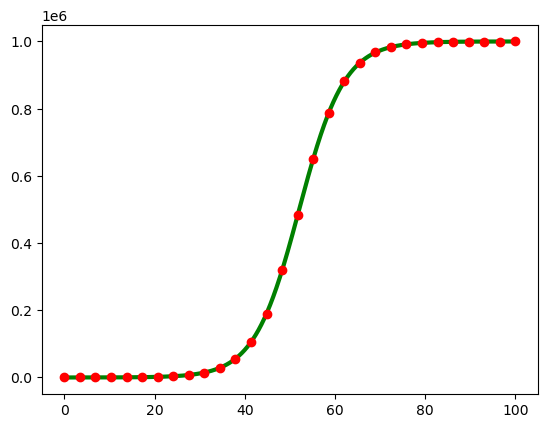

In [19]:
plt.plot(t3,logistic(t3),'g-',lw=3,label='book')
plt.plot(t4,X2,'ro',label='computing')

In [20]:
# === a more realistic model ====
# === predator and prey model ======

In [21]:
def f3(t,x):
    R,W,R_d,W_d=x
    R_d2=k*R_d-a*(R_d*W+R*W_d)
    W_d2=-r*W_d+b*(R_d*W+R*W_d)
    return np.array([R_d,W_d,R_d2,W_d2])

In [22]:
a=1e-3
b=1e-5
k=0.2
r=0.08
R0=1e4
W0=100
R_d0=k*R0-a*R0*W0
W_d0=-r*W0+b*R0*W0

x0=[R0,W0,R_d0,W_d0]

In [23]:
ans3=sp.integrate.solve_ivp(
    f3,[0,1000],x0,dense_output=True)

In [24]:
t5=np.linspace(0,53,200)
X_3=ans3.sol(t5).T

In [25]:
X_3.shape

(200, 4)

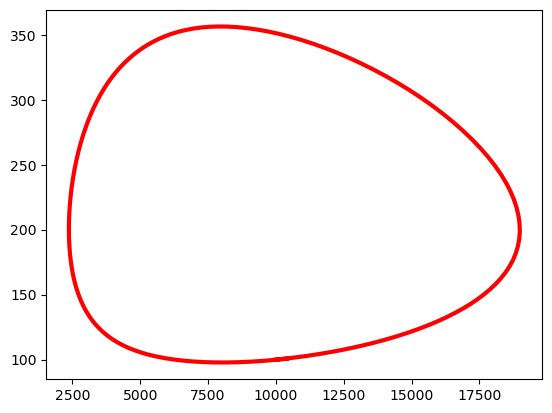

In [26]:
plt.plot(X_3[:,0],X_3[:,1],'r-',lw=3)

In [27]:
c=['r-','gd','bx','m.-','k:']

Text(0, 0.5, 'wolves')

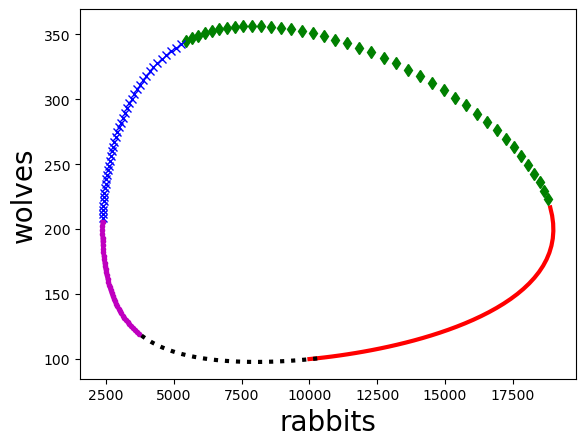

In [40]:
for i in range(5):
    plt.plot(X_3[i*40:(i+1)*40,0],
             X_3[i*40:(i+1)*40,1],c[i],lw=3)
plt.xlabel('rabbits',size=20)
plt.ylabel('wolves',size=20)

In [29]:
mask1=X_3[:,2].any()>0 and X_3[:,3].any()>0
mask2=X_3[:,2].all()>0 and X_3[:,3].all()<=0
mask3=X_3[:,2].all()<=0 and X_3[:,3].all()>0
mask4=X_3[:,2].all()<=0 and X_3[:,3].all()<=0


In [30]:
X_3[mask1].shape

(1, 200, 4)

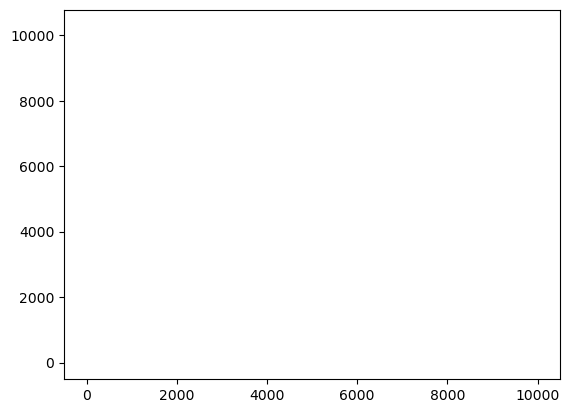

In [31]:
plt.plot(X_3[mask1][:,0],X_3[mask1][:,1],c[0],lw=3)

Text(0, 0.5, 'rabbit growth rate')

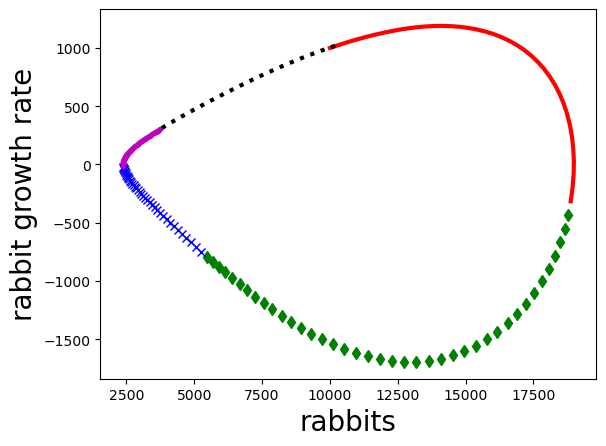

In [41]:
for i in range(5):
    plt.plot(X_3[i*40:(i+1)*40,0],
             X_3[i*40:(i+1)*40,2],c[i],lw=3)
plt.xlabel('rabbits',size=20)
plt.ylabel('rabbit growth rate',size=20)

Text(0, 0.5, 'wolf growth rate')

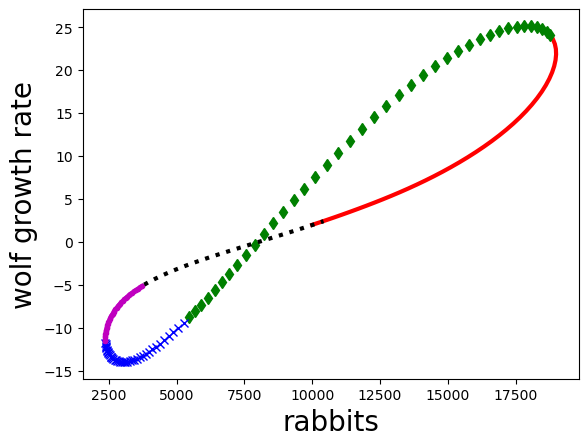

In [42]:
for i in range(5):
    plt.plot(X_3[i*40:(i+1)*40,0],
             X_3[i*40:(i+1)*40,3],c[i],lw=3)
plt.xlabel('rabbits',size=20)
plt.ylabel('wolf growth rate',size=20)

Text(0, 0.5, 'rabbit growth rate')

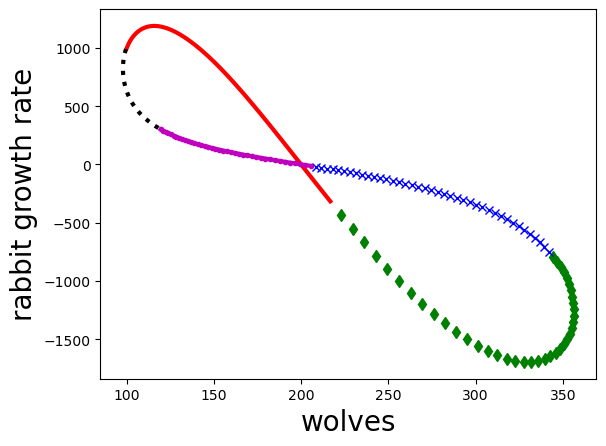

In [43]:
for i in range(5):
    plt.plot(X_3[i*40:(i+1)*40,1],
             X_3[i*40:(i+1)*40,2],c[i],lw=3)
plt.xlabel('wolves',size=20)
plt.ylabel('rabbit growth rate',size=20)

Text(0, 0.5, 'wolf growth rate')

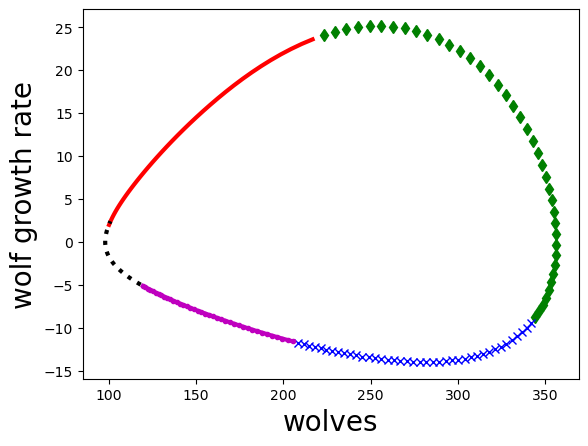

In [44]:
for i in range(5):
    plt.plot(X_3[i*40:(i+1)*40,1],
             X_3[i*40:(i+1)*40,3],c[i],lw=3)
plt.xlabel('wolves',size=20)
plt.ylabel('wolf growth rate',size=20)

Text(0, 0.5, 'rabbit growth rate')

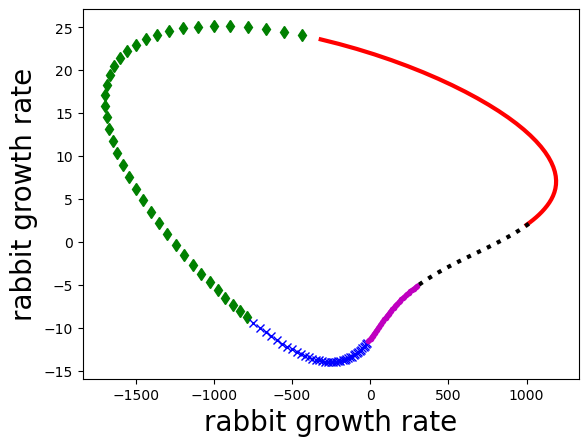

In [45]:
for i in range(5):
    plt.plot(X_3[i*40:(i+1)*40,2],
             X_3[i*40:(i+1)*40,3],c[i],lw=3)
plt.xlabel('rabbit growth rate',size=20)
plt.ylabel('wolf growth rate',size=20)

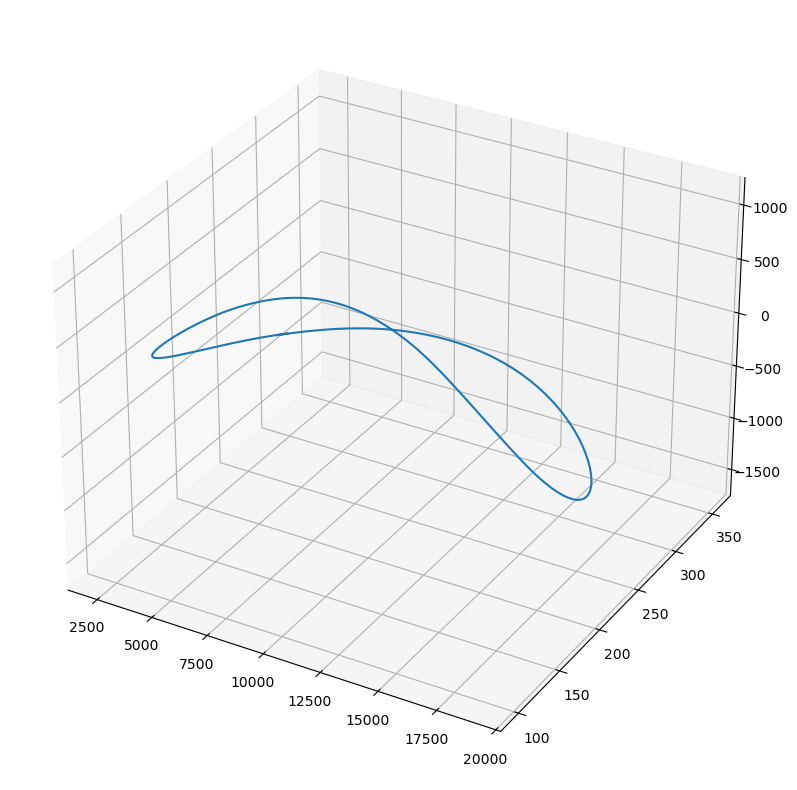

In [37]:
fig1=plt.figure(figsize=(10,10))
ax=fig1.add_subplot(111,projection='3d')
ax.plot(X_3[:,0],X_3[:,1],X_3[:,2])